In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

In [2]:
plt.style.use('seaborn')

## Generate Data

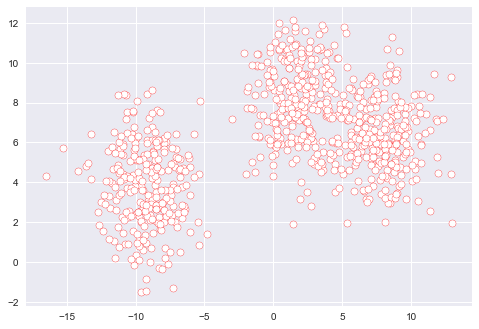

In [3]:
# create dataset
X, _ = make_blobs(n_samples=800, n_features=2, 
                  centers=3, cluster_std=1.9, 
                  shuffle=True, random_state=20)

# plot
plt.scatter(X[:, 0], X[:, 1], c='white', edgecolor='red', marker='o', s=50)

plt.show()

## Model Data

In [4]:
from sklearn.cluster import KMeans # DBSCAN, AgglomerativeClustering

In [5]:
km = KMeans(n_clusters=3, init='random', max_iter=300, random_state=20)
y_km = km.fit_predict(X)

## Plot Cluster

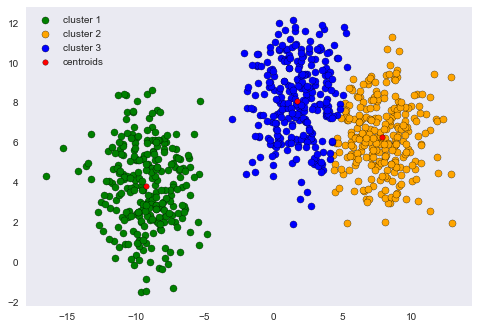

In [6]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='green', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='blue', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=30, c='red', edgecolor='black', label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid(False)
plt.show()

## Elbow Method

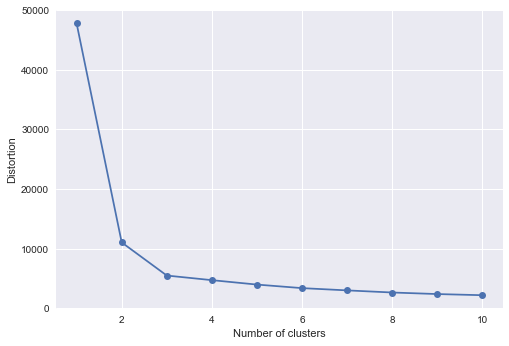

In [7]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_) 
    # Inertia is the sum of squared distances of samples to their closest cluster center.
    # Elbow method shows that the best K is 2 (probably 3 can be better)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

---